## Lending Club   Analysis

* **Chetan Karnik**

### Problem Statement
Lending club is a online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

#### Lending Club  has few constraints :

-  Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss).

-  Borrowers who default cause the largest amount of loss to the lenders.

#### Lending facilitating company  also face  two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


###  Bussiness Objective/ End Expectation from Lending club

#### Goal of the Data Analysis:

- **Driving factors:**   The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 
- **Insight from Driving Factors:** The company can utilise this knowledge for its portfolio and risk assessment. 


#### Broader Strategy : 
- **Make a Informed decision:**  Based on the insights one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.

#### Key coutcome
-  Based on the type of Loan application derisk the loan approaval at the time of approval 
-  Identify the pattern of "deafaulers" early based on the given data set.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn theme 
sns.set_style("darkgrid")

In [3]:
def debug_log(df = pd.DataFrame(), fname = ' ',decision = False):
    if (df != df.empty or fname !=' ' and decision):
        df.to_csv(fname +".csv")
    else:
        print("No log created!!!")
        pass

#### Refer : [4]
Reference and reused plot from online, customised as per our assignment requirement, 
reference link provided Credited [4] 


In [4]:
def plot_graph(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=12,fig_size_y=6): 
    ncount = len(loan_data)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)


In [5]:
with open ("loan.csv", 'rb') as rawdata:
    encode_type = chardet.detect(rawdata.read(2000))
print(encode_type)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


### File Reading &  Resolving Encoding issues 

####  Note :
 * Correct encoiding "iso-8859-1' followed to read the file.
 * 'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
 * All source file to be placed under the ./data folder in present directory.

In [6]:
# understand first few rows
# latin-1 is synonymous to ISO-8859-1  
master_loan_data = pd.read_csv("loan.csv", encoding ="iso-8859-1")
loan_data = master_loan_data.copy()
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_data.shape

(39717, 111)

In [8]:
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### 1.0  Data Understanding

In [9]:
# Check on all the columns in the file.
list(loan_data.columns.unique())

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

#### 1.1 Make use of relevant column 
* Analyse each and every column for its usefulness for our study. Drop all the columns that seem to be noise
##### Stage 1 of data cleanup
* Open the csv file in Excel. Observe contents of each column and make a decision
* The following columns are very relevant to make analysis for default , 
* Lot of cloumns contain just a single value. Example NA, INDIVIDUAL, n etc. Drop all columns that have the same data all through
* In case any columns are required either make sure of master data or feel free to add to this list to use throughout the file

In [10]:
columns_relevant = [
'id',
'emp_title ',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'term',
'int_rate',
'loan_status',
'grade',
'sub_grade',
'dti',
'delinq_2yrs',
'pub_rec',
'issue_d',
'term',
'installment',
'zip_code'
];

### 2.0 Data Cleaning

#### 2.1 Row or Columns exclusion
- Remove all the non relevant columns & Rows
- This includes also removal of columns > 80% NaN

In [11]:
column_drop_list = [x for x in loan_data.columns if x not in columns_relevant]
#column_removal_list
for col in column_drop_list:
    loan_data = loan_data.drop(col, axis=1)
    

In [12]:
loan_data.shape


(39717, 21)

In [13]:
loan_data.columns.unique()

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'pub_rec'],
      dtype='object')

#### 2.2  Null value exclusion  

In [14]:
round(100*(loan_data.isnull().sum()/len(loan_data.index)),2)

id                     0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
zip_code               0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
pub_rec                0.00
dtype: float64

#### 2.2 Data exclusion 
The loan status 
 * column has  has **Fully Paid, Current, Charged off** status of the Loan
 * For Analysis purpose its very relevant to use only Fully Paid,Charged off and exlcude **Current**


In [15]:
loan_data = loan_data[loan_data.loan_status != 'Current']
loan_data.shape

(38577, 21)

#### 2.3 Format Convertion
* Manipulation of strings and dates
* The data in the columns are in string format prefixed or postfixed with symbols chargecters etc ex
        ex   'int_rate  = 10%,  'emp_length" = 10years


In [16]:
def strip_to_num(orig_str_value):
    num = ''.join([i for i in orig_str_value if i.isdigit()])
    return num
     
#print(strip_to_num("TestRaghu1234>10"))

In [17]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: strip_to_num(str(x)))
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: int(x)/100)
loan_data.int_rate.sort_values(ascending = False)

13492    24.40
1799     24.11
5964     24.11
1619     24.11
6456     23.91
         ...  
18212     5.42
18208     5.42
18182     5.42
13787     5.42
8133      5.42
Name: int_rate, Length: 38577, dtype: float64

Lets analyse the emp_length column

In [18]:
emp_length = set(loan_data.emp_length)

In [19]:
emp_length

{'1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 nan}

Lets remove " year" and " years", replace < 1 by 0, 10+ by 10 and nan by -1

In [20]:
loan_data.emp_length = loan_data.emp_length.apply(lambda x: str(x).replace(" years",""))
loan_data.emp_length = loan_data.emp_length.apply(lambda x: str(x).replace(" year",""))
loan_data.emp_length = loan_data.emp_length.apply(lambda x: str(x).replace("< 1","0"))
loan_data.emp_length = loan_data.emp_length.apply(lambda x: str(x).replace("10+","10"))
loan_data.emp_length = loan_data.emp_length.fillna(-1)

Lets check out set once again

In [21]:
emp_length = set(loan_data.emp_length)
emp_length

{'0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'nan'}

nan is actually a value. Lets replace it with -1

In [22]:
loan_data.emp_length = loan_data.emp_length.apply(lambda x: str(x).replace("nan","-1"))

Lets check one last time. Then convert the datatype to int

In [23]:
emp_length = set(loan_data.emp_length)
emp_length

{'-1', '0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'}

In [24]:
loan_data.isnull().sum()

id                     0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
delinq_2yrs            0
pub_rec                0
dtype: int64

In [25]:
def plot_bar_graph(data_f, var_to_plot):
    plt.figure(figsize=(10,4))
    sns.barplot(x='index', y=var_to_plot, data=data_f)
    plt.xlabel(var_to_plot)
    plt.ylabel('Proportion')
    plt.title(var_to_plot +' Distribution')
    plt.show()

In [26]:
# high is risk of default 
def asses_loan_to_income(l_to_i):
    if l_to_i > 0.2:
        return 'high'
    elif l_to_i > 0.1 and l_to_i <= 0.2:
        return 'moderate'
    else:
        return 'low'
## print(asses_loan_to_income(0.18))       

In [27]:
# high is risk of default 
def asses_debt_to_income(d_to_i):
    if d_to_i <= 10.00:
        return 'low'
    elif (d_to_i >10.00 and d_to_i <= 20.00):
        return 'medium'
    else:
        return 'high'
## print(asses_debt_to_income(0.2))   

In [28]:
def asses_experience(exp):
    if exp < 0:
        return 'Self Employed'
    elif exp >= 0 and exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 9):
        return 'Senior'
    else:
        return 'Specialist'

In [29]:
def asses_interest_rate(int_rate):
    if int_rate <= 10.0:
        return 'low'
    elif (int_rate >10 and int_rate <= 20):
        return 'moderate'
    else:
        return 'high'

## 3.0 Data Analysis 

## Univariate Analysis

#### Columns availble for analyis 
 columns = [
'id',
'emp_title ',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'term',
'int_rate',
'loan_status',
'grade',
'sub_grade',
'dti',
'delinq_2yrs',
'pub_rec',
'issue_d',
'term',
'installment'
];

#### 3.1 Interest_rate 
* Interest rate is important factor in lending which defines all the end results 
* Main driving factor in successfull transection in lending business logic

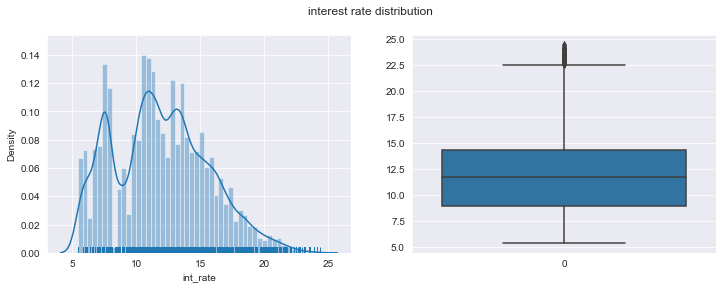

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

#### Inference  :
From the above 2 plots:  most of the interest rates lies between 9% to 14.5%. 
Highest rates of interest i.e., 24.40%

#### 3.2 Loan Amount

Loan Amount is major factor which defines the capacity of a borrower and amount investor has lend.


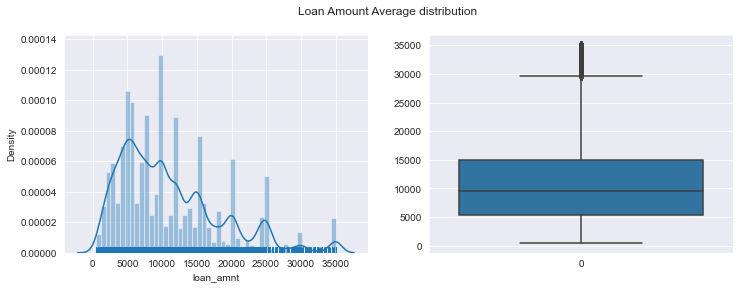

In [31]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=loan_data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan_data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount Average distribution')
plt.show()

In [32]:
print('Median amount of loan availed', loan_data.loan_amnt.median())
loan_data.loan_amnt.describe()

Median amount of loan availed 9600.0


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Inference  :
*  From the above 2 plots:  the loan amount median is 10000, 
*  Maximum number of people tend to take loan amount of 10000, and  And very few people took more than $ 15000 loan amount.
* No significance inference on default status based on these variables:
     * **funded_amnt**:  Lending club approved most of Applied loan amount.Funded amount data is proportion to loan Amount,
     Which tells us that Lending club approved most of Applied loan amount.
     * **funded_amnt_inv**:The total amount committed by investors for that loan at that point in time.Borrowers got 100% loan amount from investors.

In [33]:
loan_data.shape

(38577, 21)

#### 3.3  Emp_length 
A lender employed for the period of time.

In [34]:
emp_lenght_count = loan_data.groupby('emp_length').emp_length.count().sum()
print("emp_lenght_count :",emp_lenght_count)
round((loan_data.groupby('emp_length').emp_length.count().sort_values(ascending =False)/emp_lenght_count),2)

emp_lenght_count : 38577


emp_length
10    0.22
0     0.12
2     0.11
3     0.10
4     0.09
5     0.08
1     0.08
6     0.06
7     0.04
8     0.04
9     0.03
-1    0.03
Name: emp_length, dtype: float64

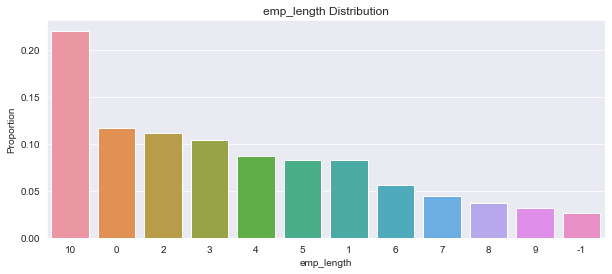

In [35]:
#Probability / Percentage of each values
emp_len_df = loan_data['emp_length'].value_counts(normalize=True).reset_index()
plot_bar_graph(emp_len_df,'emp_length')



#### 3.3  Grade 
*  Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. 
* Hence its important to check on the type of loan grades has been disbursed to various lenders

In [36]:
loan_grade_count = loan_data.groupby('grade').grade.count().sum()
print("loan_grade_count :",loan_grade_count)

round((loan_data.groupby('grade').grade.count().sort_values(ascending = False)/loan_grade_count),2)

loan_grade_count : 38577


grade
B    0.30
A    0.26
C    0.20
D    0.13
E    0.07
F    0.03
G    0.01
Name: grade, dtype: float64

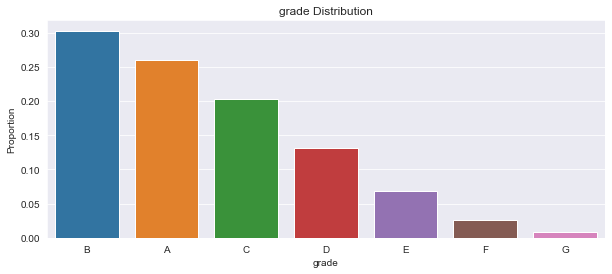

In [37]:
#Probability / Percentage of each values
grade_df = loan_data['grade'].value_counts(normalize=True).reset_index()
plot_bar_graph(grade_df, 'grade')

#### Inference
*  Most borrowers fall under A and B grades than other grades


#### 3.4  Home ownership 

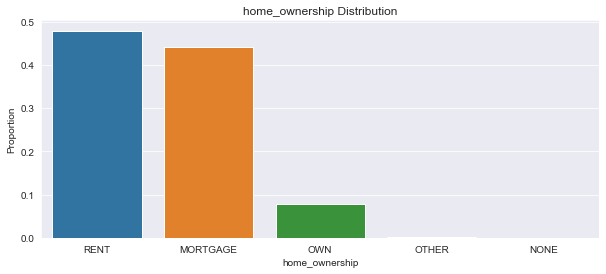

In [38]:
var = 'home_ownership'
#Probability / Percentage of each values
home_df = loan_data[var].value_counts(normalize=True).reset_index()
plot_bar_graph(home_df, var)


#### Inference :
Most of the borrowers are either holding Rented properties or Mortagage 

#### 3.5  Loan status   : 


In [39]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [40]:
total_loan_status = loan_data.groupby('loan_status').loan_status.count().sum()
print("total_loan_status :", total_loan_status)


total_loan_status : 38577


In [41]:
round((loan_data.groupby('loan_status').loan_status.count().sort_values(ascending =False)/total_loan_status),2)

loan_status
Fully Paid     0.85
Charged Off    0.15
Name: loan_status, dtype: float64

<Figure size 864x288 with 0 Axes>

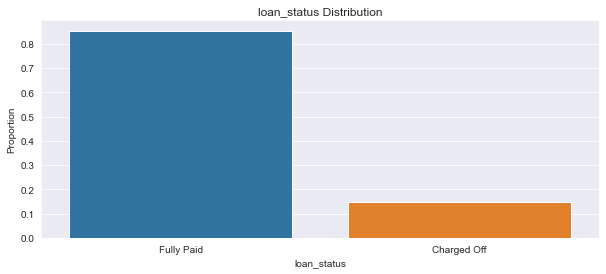

In [42]:
plt.figure(figsize=(12,4))
Loan_df = loan_data['loan_status'].value_counts(normalize=True).reset_index()
plot_bar_graph(Loan_df,'loan_status')

#### Inference 
* **86%** of borrowers has paid the loan fully. where are **14.4%** are defaulted the loan.
* Around 1 in 5 borrowers are defaulted.

#### 3.6 Purpose of Loan:
* Evaluate purpose of Loan
* Segregate most frequent purpose of the loan & to stream line which are highest loans

In [43]:
loan_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [44]:
total_purpose_count =loan_data.groupby('purpose').purpose.count().sum()

In [45]:
round((loan_data.groupby('purpose').purpose.count().sort_values(ascending = False)/total_purpose_count),2)

purpose
debt_consolidation    0.47
credit_card           0.13
other                 0.10
home_improvement      0.07
major_purchase        0.06
small_business        0.05
car                   0.04
wedding               0.02
medical               0.02
moving                0.01
vacation              0.01
house                 0.01
educational           0.01
renewable_energy      0.00
Name: purpose, dtype: float64

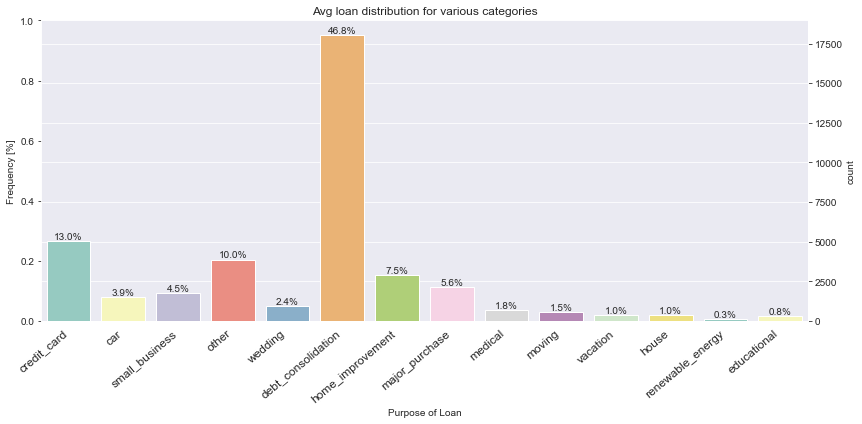

In [46]:
tilt = True
plot_graph("purpose",loan_data,'Purpose of Loan','Avg loan distribution for various categories', None, tilt)

#### Inference 

* From above plots we can see that average default rate across all categories is  14.4% 
* Top Six Purpose of the Loan availed categories are 
    * debt_consolidation    
    * credit_card           
    * other                 
    * home_improvement      
    * major_purchase 
    * small_business    


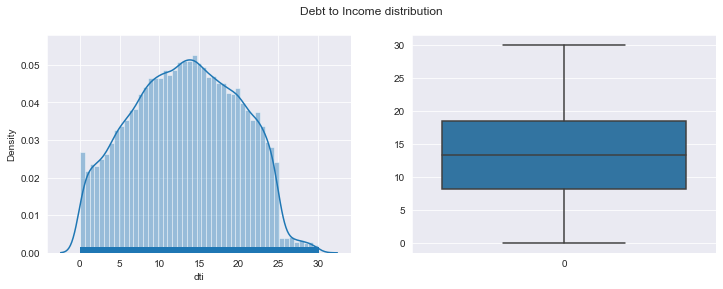

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a= loan_data.dti, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data= loan_data.dti)
plt.suptitle('Debt to Income distribution')
plt.show()

#### Inference :
* The distribution is very much similar to normal distribution.
* All the  barrower's who have Debt to Income ration less than 30.

#### 3.8 Public Record  : (pub_rec)

* A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.

* The only type of public record information that would appear on your credit report is a bankruptcy filing., Bankruptcy information is collected and updated regularly from the courts. Filing for bankruptcy is considered derogatory because you are telling all your lenders that you will not be able to pay them in full, or at all.

<Figure size 864x288 with 0 Axes>

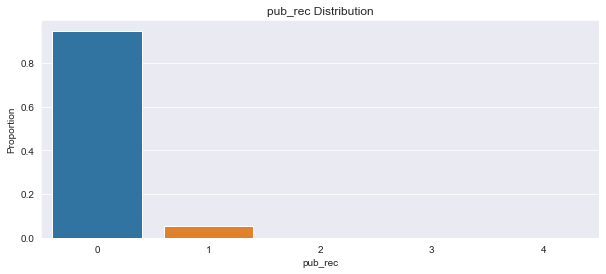

In [48]:
plt.figure(figsize=(12,4))
pub_df = loan_data['pub_rec'].value_counts(normalize=True).reset_index()
plot_bar_graph(pub_df,'pub_rec')

#### Inference :
Around 10% borrower's are having  public derogatory records.

##  Segmented Univariate Analysis

* Segment the categorical variables and then conduct univariate analysis across its categories

#### 3.9 Term vs Public Record : (pub_rec)


In [49]:
#Correlate with  the Term duration and Public Record finding 
# conoslidate the proportionate public record against Term
term_vs_pub_record = loan_data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()


In [50]:
#make a derived entity to proportion
term_vs_pub_record['proportion'] = term_vs_pub_record.groupby('pub_rec').transform(lambda x: x/x.sum())
term_vs_pub_record

,pub_rec,term,id,proportion
0,0,36 months,27582,0.755526
1,0,60 months,8925,0.244474
2,1,36 months,1467,0.728763
3,1,60 months,546,0.271237
4,2,36 months,38,0.791667
5,2,60 months,10,0.208333
6,3,36 months,7,1.000000
7,4,36 months,2,1.000000


Text(0.5, 1.0, 'Terms vs Public records')

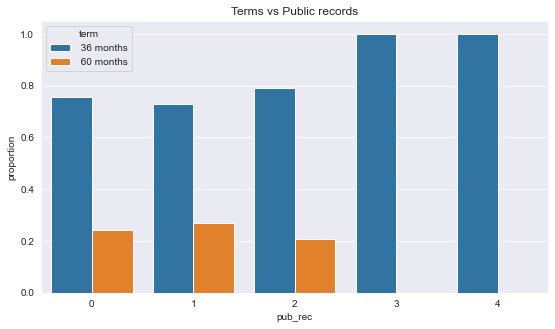

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=term_vs_pub_record)
plt.title('Terms vs Public records')

#### Inference 
* Borrwers who took less than 60 months tenure has higher public derogatory records.
 where as 80% for lower public derogatory records borrowers are having 36 month tenure.
 and rest 20%  have 60months tenure.
  

#### 3.10 grade vs Public Record : 


In [52]:
grade_vs_pub_record = loan_data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
grade_vs_pub_record['proportion'] = grade_vs_pub_record.groupby('pub_rec').transform(lambda x: x/x.sum())
grade_vs_pub_record.head(5)


,pub_rec,grade,id,proportion
0,0,A,9896,0.271071
1,0,B,11039,0.302380
2,0,C,7242,0.198373
3,0,D,4703,0.128825
4,0,E,2460,0.067384


<AxesSubplot:title={'center':'Grade vs Public records'}, xlabel='pub_rec', ylabel='proportion'>

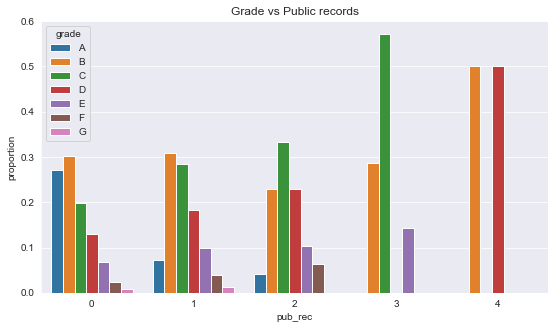

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=grade_vs_pub_record)

#### Inference :
* 'A' grade people are having less derogatory records than other grades.  
*  C,D,E graded people tend to have  having high pub_recs.


#### 3.11 Verification vs Public Record : 

In [54]:
ver_vs_pub_rec = loan_data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
ver_vs_pub_rec['proportion'] = ver_vs_pub_rec.groupby('pub_rec').transform(lambda x: x/x.sum())

Text(0.5, 1.0, 'Verification status vs Public records')

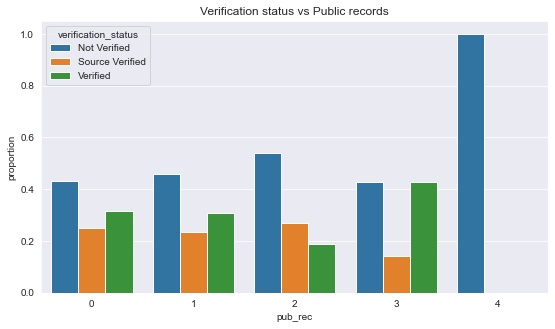

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=ver_vs_pub_rec)
plt.title('Verification status vs Public records')

#### Inferences :
* Borrowers with 4 public Derogatory record are Not verified Catogry of verification status.

#### 3.12 Interest rate  vs Loan Status  : 

In [56]:
loan_data['irate_asses'] = loan_data['int_rate'].apply(lambda x:asses_interest_rate(int(x)))

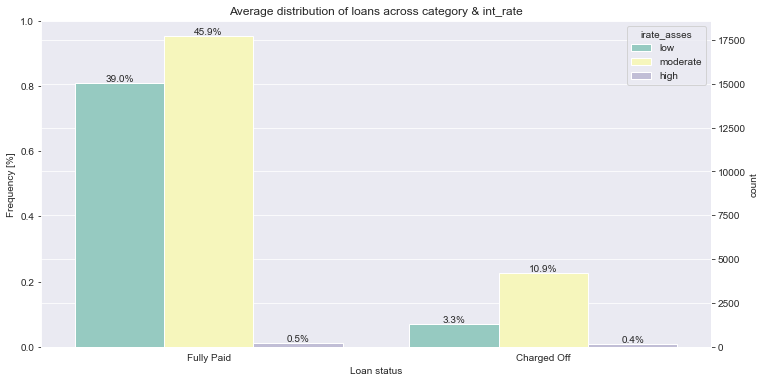

In [57]:
#loan_data.to_csv('Top6Loan.csv')
plot_graph("loan_status",loan_data,'Loan status','Average distribution of loans across category & int_rate','irate_asses')

Text(0.5, 1.0, 'loan_status vs Loan int_rate')

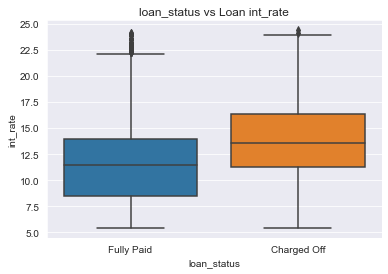

In [58]:
sns.boxplot(x='loan_status', y=loan_data.int_rate, data=loan_data)
plt.title('loan_status vs Loan int_rate')


#### Inference:  
* Grater the interest rate more the chance of Defaulting the loan.
* 11.6% of moderate interest rate  "charged off' and 0.4% high interest rate still change off.
* Only 0.5% of high interest rate borrowers could able to pay off 



#### 3.12 Interest rate vs grade :

<AxesSubplot:title={'center':'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

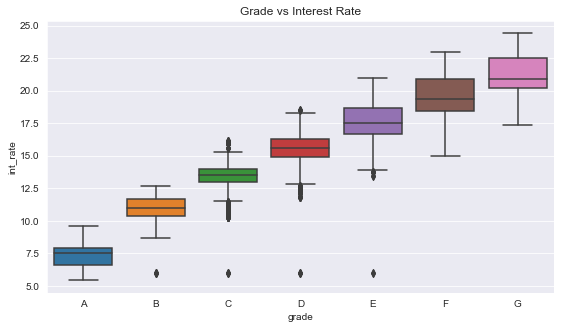

In [59]:
plt.figure(figsize=(20,5))

plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.int_rate, order = grade_ord, data=loan_data)

#### Inference 
 Interest Rates are Higher as Grades ascending towards  A to G.

#### 3.13 Loan Amount vs grades

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

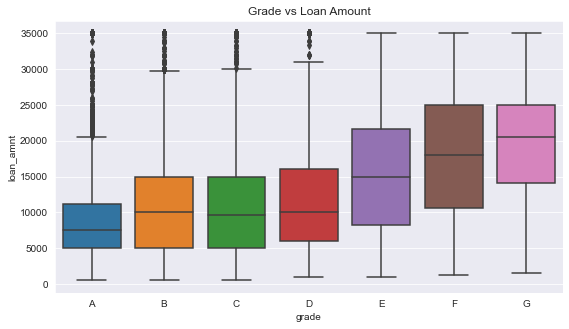

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.loan_amnt, order = grade_ord, data=loan_data)

#### Inference:
 * Grade 'G' and 'H' have taken max loan amount. Lower Grades loans  have higher loan amount.

###  3.14 dti  vs grade :

In [61]:
loan_data['dti_assesed'] = loan_data['dti'].apply(lambda x:asses_debt_to_income(x))

<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

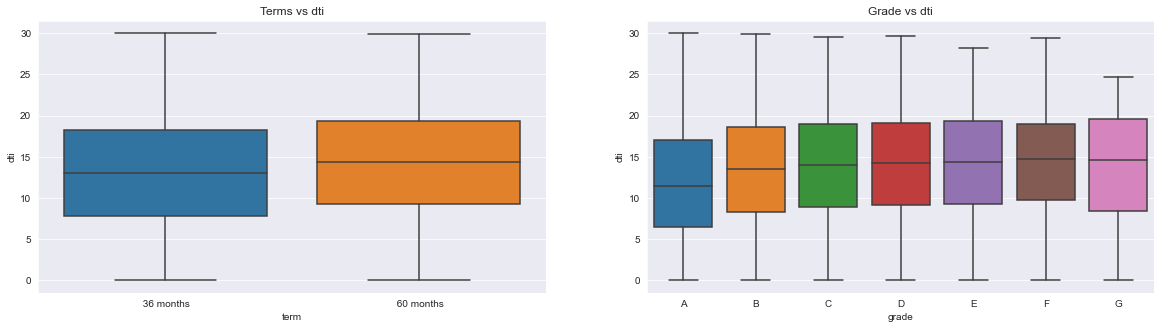

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.dti, data=loan_data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.dti, order = grade_ord, data=loan_data)

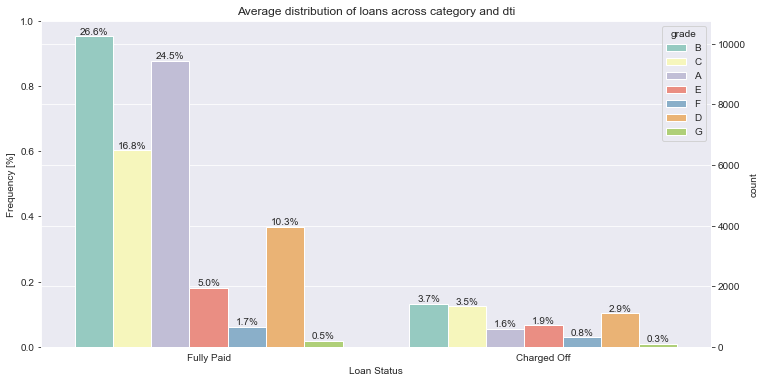

In [63]:
plot_graph("loan_status",loan_data,'Loan Status','Average distribution of loans across category and dti','grade')

####  Inference:
* People with high dti tend to get more tenure ie 60 months.  
 * A Grade barrowers are having low DTI than Other grades. 
 * DTI low is indicator of high repayment capability for repayment.
 * Most likely  B, C, D loan grade  borrowers tend to charge off compare to other loan grades

####  3.14 dti  vs Loan_status  :

Text(0.5, 1.0, 'loan_status vs dti')

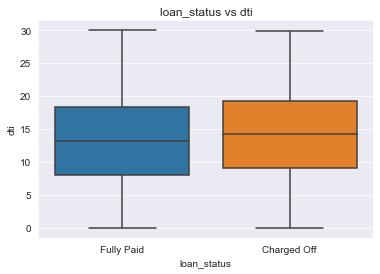

In [64]:
sns.boxplot(x='loan_status', y=loan_data.dti, data=loan_data)
plt.title('loan_status vs dti')

In [65]:
total_exp_level_count =loan_data.groupby('dti_assesed').dti_assesed.count().sum()
round((loan_data.groupby(['loan_status','dti_assesed']).loan_status.count().sort_values(ascending=False)/total_exp_level_count),2)


loan_status  dti_assesed
Fully Paid   medium         0.41
             low            0.29
             high           0.16
Charged Off  medium         0.07
             low            0.04
             high           0.03
Name: loan_status, dtype: float64

In [66]:
#loan_data.to_csv("Top6Loan.csv")
round((loan_data.groupby(['loan_status','irate_asses']).int_rate.count().sort_values(ascending=False)/total_exp_level_count),3)

loan_status  irate_asses
Fully Paid   moderate       0.459
             low            0.390
Charged Off  moderate       0.109
             low            0.033
Fully Paid   high           0.005
Charged Off  high           0.004
Name: int_rate, dtype: float64

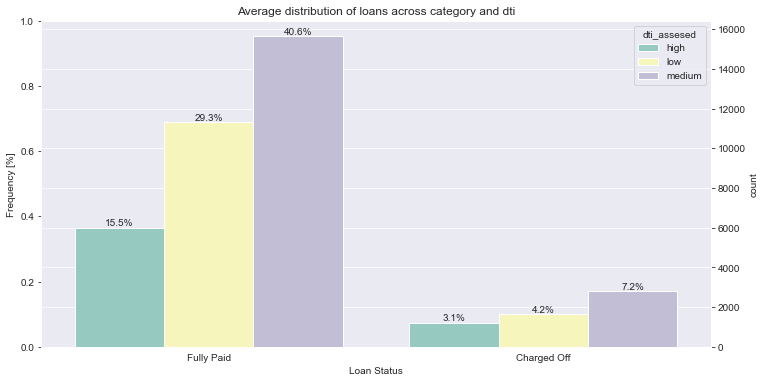

In [67]:
plot_graph("loan_status",loan_data,'Loan Status','Average distribution of loans across category and dti','dti_assesed')

#### Inference
* DTI is  hihger end  for the  people who got more tenure i.e., 60 months.
If you obersev closely higher the grade the DTI is increasing 
The investors like low DTI borrowers which is indication of good financial repayment wiggle room.
* Borrowers with high DTI has high probability to default
* Out of The Top 6 purpose for borrowing, the debt_consolidation and  Credit card has higher DTI

In [68]:
import datetime 

####  3.15 dti  vs Purpose   :

In [69]:
top6_loans = loan_data.copy()


In [70]:
top6_category = ['debt_consolidation',
'credit_card',
'other',
'home_improvement',
'major_purchase',
'small_business']

In [71]:
loan_data = loan_data.query('purpose == @top6_category')

In [72]:
loan_data['purpose'].unique()

array(['credit_card', 'small_business', 'other', 'debt_consolidation',
       'home_improvement', 'major_purchase'], dtype=object)

Text(0.5, 1.0, 'purpose vs dti')

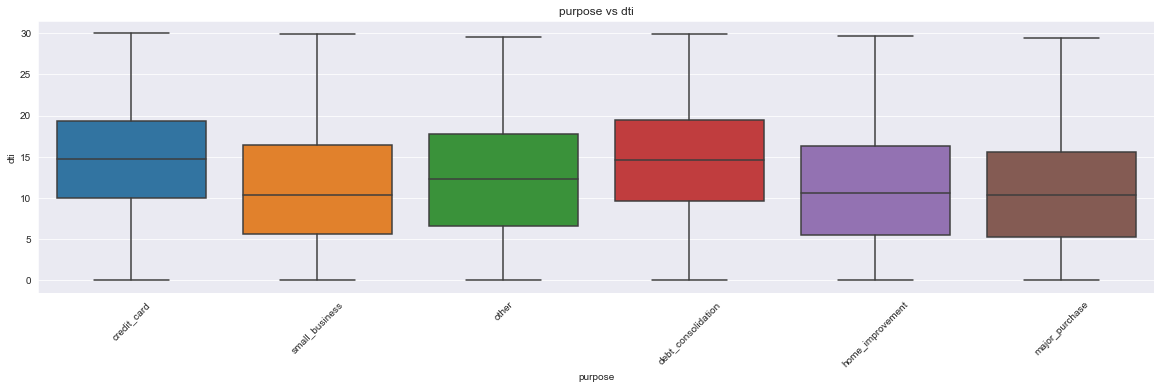

In [73]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.dti, data=loan_data)
plt.xticks(rotation=45)
plt.title('purpose vs dti')

#### Inference:

* The highest loan amount taken as per count was debt_conslidation
* ['debt_consolidation', 'credit_card', 'other', 'home_improvement','major_purchase','small_business'] are purpose of loan borrowers.



####  3.15 Loan status   vs exp_level   :

In [74]:
loan_data['exp_level'] = loan_data['emp_length'].apply(lambda x:asses_experience(int(x)))
total_exp_level_count =loan_data.groupby('exp_level').exp_level.count().sum()

In [75]:

round((loan_data.groupby(['loan_status','exp_level']).exp_level.count().sort_values(ascending=False)/total_exp_level_count),2)

loan_status  exp_level    
Fully Paid   Junior           0.35
             Senior           0.29
             Specialist       0.19
Charged Off  Junior           0.06
             Senior           0.05
             Specialist       0.04
Fully Paid   Self Employed    0.02
Charged Off  Self Employed    0.01
Name: exp_level, dtype: float64

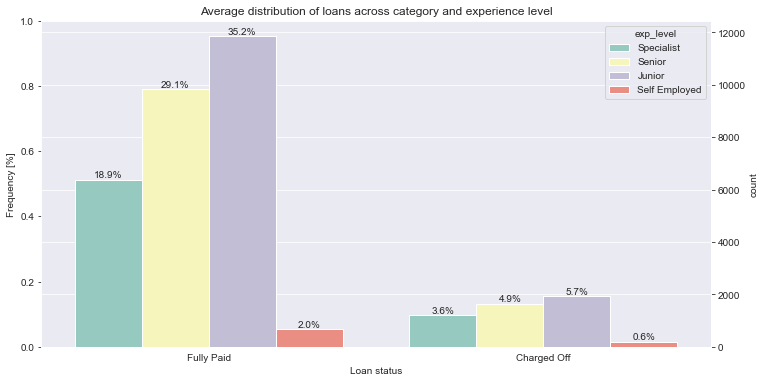

In [76]:
#loan_data.to_csv('Top6Loan.csv')
plot_graph("loan_status",loan_data,'Loan status','Average distribution of loans across category and experience level','exp_level')



#### Inference :
* In terms of Loan status & charge off status more Junior experience level are prone to charge offf

####  3.16  Loan status   vs  Loan to income ratio   :

 * The loan to Income ratio key indicator for how much income avialble after loan  repayment, 
 * More then Loan_to_income ration more chances borrowers default 

In [77]:
#Loan to Annual Income
loan_data['loan_to_income'] = round(loan_data['loan_amnt']/ loan_data['annual_inc'],2)

loan_data['lti_assesed'] = loan_data['loan_to_income'].apply(lambda x:asses_loan_to_income(x))

In [78]:
total_exp_level_count =loan_data.groupby('lti_assesed').dti_assesed.count().sum()
round((loan_data.groupby(['loan_status','lti_assesed']).loan_status.count().sort_values(ascending=False)/total_exp_level_count),3)


loan_status  lti_assesed
Fully Paid   moderate       0.315
             high           0.310
             low            0.228
Charged Off  high           0.073
             moderate       0.045
             low            0.029
Name: loan_status, dtype: float64

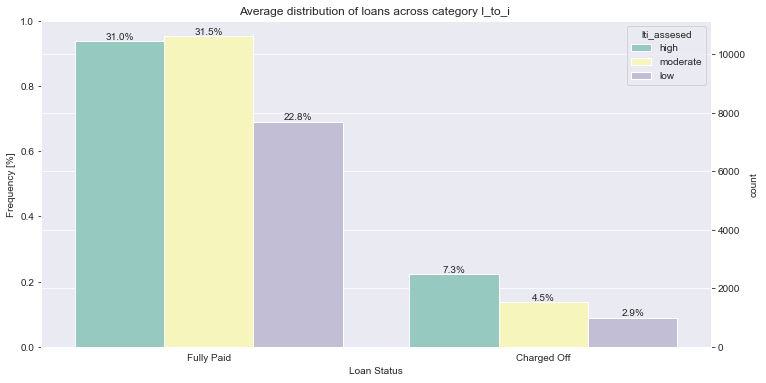

In [79]:
plot_graph("loan_status",loan_data,'Loan Status','Average distribution of loans across category l_to_i ','lti_assesed')

####  Inference 

 * The 7.2% of borrowers are charged off who has high Loan to Income ratio.
 * Followed by 4.5% with  moderate lti.
 * Mean 8/100 borrowers sure to charge off if they have High Lti ratio.
 * 5/100 people with moderate lti chance of charged off
 * so its sure assume 12% of people with moderate and High lti are charged off at any given condition.


####  3.17  annual income    vs  verfication   :

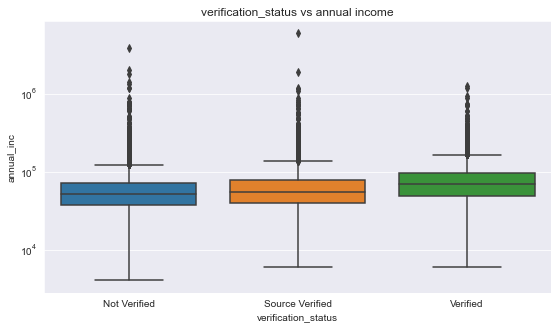

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.annual_inc, order = verification_status_ord, data=loan_data)
plt.yscale('log')

#### Inference
* For higher annual incomes : The income source was verfied .
* For lower annual incomes the source was not verified for most of the cases
* No significant inference can be derived from this graphs
* Loan is Fully paid for most of the borrower's who had higher annual incomes. 

## Bivariate Analysis


#### 3.18 Term vs Loan Status

         term  loan_status     id
0   36 months  Charged Off   2812
1   36 months   Fully Paid  22590
2   60 months  Charged Off   2174
3   60 months   Fully Paid   6150


Text(0.5, 1.0, 'Term vs Loan status')

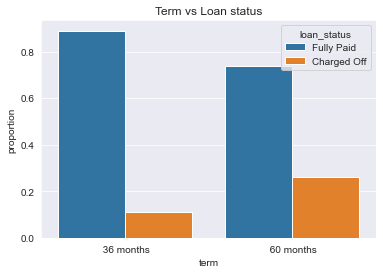

In [81]:
#Proportion of values for each category
term_vs_loan_status = loan_data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
print(loan_data.groupby(['term', 'loan_status'], as_index=False)['id'].count())
term_vs_loan_status['proportion'] = term_vs_loan_status.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=term_vs_loan_status, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')


#### Inference  
* The charge off is more in longer tenure loans compare to shorter terms
* That implies Fully Paid rate is higher in 36 months tenure than 60 month tenure

#### 3.19  Term vs Interest Rate vs default status


Text(0.5, 1.0, 'Term vs Interest rate')

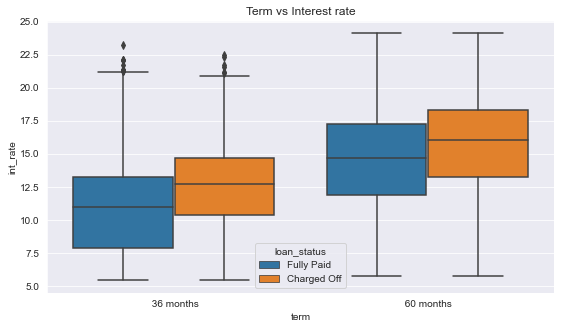

In [82]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_data)
plt.title('Term vs Interest rate')


####  Inference 
* Higher interest rate is high  proportionally charge off rate is high irrespective of Tenure. 
* However its very prominent in the longer tenure with higher interest rate charge off is significant.

#### 3.20 Grade vs Loan staus vs default status

Text(0.5, 1.0, 'Grade vs Loan status')

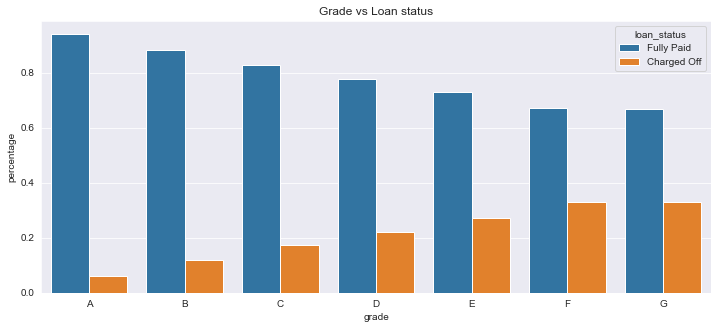

In [83]:

grade_vs_loan_status = loan_data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
grade_vs_loan_status['percentage'] = grade_vs_loan_status.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=grade_vs_loan_status, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')


#### Observations:
The lower grade of loan the Charged off rate increases proportinaltely.

#### 3.21 Grade vs Loan amount vs default status

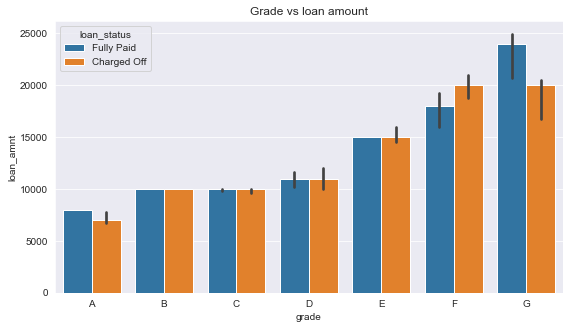

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median, order = grade_ord)
plt.title('Grade vs loan amount')
plt.show()

#### Inference :
* The high loan amount is  disbersed in lower grade loans which is also indicates higher charge off instances.
* The lower the Loan grade the Charged off rate increases proportinaltely.

#### 3.22 Grade vs interest rate  vs default status

Text(0.5, 1.0, 'Grade vs Interest Rate')

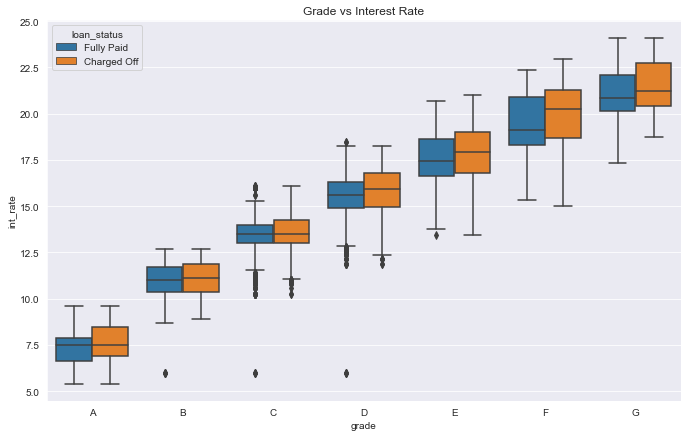

In [85]:
plt.figure(figsize=(25,7))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_data, order = grade_ord)
plt.title('Grade vs Interest Rate')

#### Inference:
* The lower grade Loan has highest interest rate & also highest possibility of charge off conditions.


#### 3.23 Purpose vs loan status  vs default status


Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

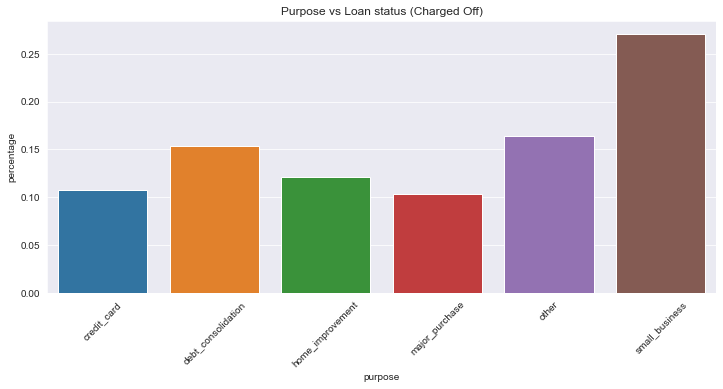

In [86]:
purpose_loan_status = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
purpose_loan_status['percentage'] = purpose_loan_status.groupby('purpose').transform(lambda x: x/x.sum())
purpose_loan_status = purpose_loan_status[purpose_loan_status.loan_status == 'Charged Off']

plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=purpose_loan_status)
plt.xticks(rotation= 45)
plt.title('Purpose vs Loan status (Charged Off)')


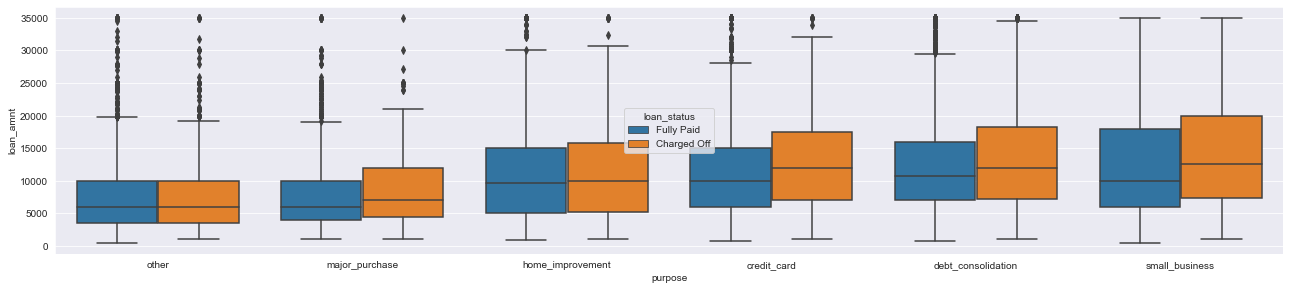

In [87]:
purpose_loan_amount = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()
purpose_loan_amount = purpose_loan_amount[purpose_loan_amount.loan_status == 'Charged Off']
order_t = purpose_loan_amount.sort_values(by='loan_amnt').purpose

plt.figure(figsize=(22,10))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_data, order=order_t)
plt.show()

#### Inference :
* The High charge off rate observed  Loan borrowed  for small buisness.

In [88]:
loan_data[loan_data.loan_status == 'Charged Off']['addr_state'].value_counts(normalize=True)

CA    0.199358
FL    0.089450
NY    0.088047
TX    0.056157
NJ    0.048736
GA    0.036502
IL    0.035901
VA    0.031488
PA    0.030084
MD    0.028881
OH    0.027677
MA    0.027477
WA    0.023265
AZ    0.021460
MO    0.021260
NC    0.020858
NV    0.019053
MI    0.018251
CO    0.018051
CT    0.017649
MN    0.014240
SC    0.012635
OR    0.011833
WI    0.011633
AL    0.009828
LA    0.009226
KY    0.007822
OK    0.007621
UT    0.007020
KS    0.005816
NM    0.005616
RI    0.004613
HI    0.004412
NH    0.004412
AR    0.004212
WV    0.003811
DC    0.002808
AK    0.002607
DE    0.002407
SD    0.002407
MT    0.002006
VT    0.001203
WY    0.000802
NE    0.000602
TN    0.000401
ID    0.000201
MS    0.000201
Name: addr_state, dtype: float64

In [89]:
top5states = loan_data[loan_data.loan_status == 'Charged Off']['addr_state'].value_counts(normalize=True).head()

In [90]:
bottom5states = loan_data[loan_data.loan_status == 'Charged Off']['addr_state'].value_counts(normalize=True).tail()

In [91]:
top5states

CA    0.199358
FL    0.089450
NY    0.088047
TX    0.056157
NJ    0.048736
Name: addr_state, dtype: float64

In [92]:
bottom5states

WY    0.000802
NE    0.000602
TN    0.000401
ID    0.000201
MS    0.000201
Name: addr_state, dtype: float64

<AxesSubplot:>

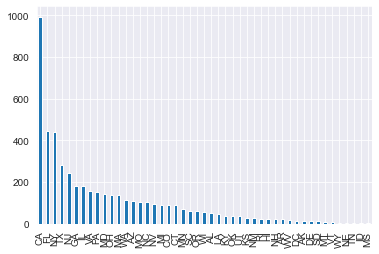

In [93]:
loan_data[loan_data.loan_status == 'Charged Off']['addr_state'].value_counts().plot(kind='bar')

#### Inference :
* People of California, Florida, New York, Texas and New Jersey like to take loans and not return them
* Vermont, Wyoming, Nebraska, Mississippi, Tennessee and Idaho residents are honest

In [94]:
loan_data[loan_data.loan_status == 'Charged Off']['zip_code'].value_counts(normalize=True).head()

945xx    0.014842
917xx    0.013037
100xx    0.012836
331xx    0.012435
112xx    0.012034
Name: zip_code, dtype: float64

In [95]:
loan_data[loan_data.loan_status == 'Charged Off']['zip_code'].value_counts(normalize=True).tail()

435xx    0.000201
053xx    0.000201
545xx    0.000201
634xx    0.000201
593xx    0.000201
Name: zip_code, dtype: float64

#### Inference :
* Scrutinize people specifically from these areas 945xx, 917xx, 331xx, 100xx and 926xx
* Very less people from these areas have defaulted on their loans 603xx, 318xx, 593xx, 947xx, 663xx

In [96]:
loan_data['bucket_loan_amount'] = pd.cut(loan_data.loan_amnt,10)
loan_data['bucket_loan_amount']

0         (3950.0, 7400.0]
2          (465.5, 3950.0]
3        (7400.0, 10850.0]
6         (3950.0, 7400.0]
8         (3950.0, 7400.0]
               ...        
39712      (465.5, 3950.0]
39713    (7400.0, 10850.0]
39714     (3950.0, 7400.0]
39715     (3950.0, 7400.0]
39716    (7400.0, 10850.0]
Name: bucket_loan_amount, Length: 33726, dtype: category
Categories (10, interval[float64]): [(465.5, 3950.0] < (3950.0, 7400.0] < (7400.0, 10850.0] < (10850.0, 14300.0] ... (21200.0, 24650.0] < (24650.0, 28100.0] < (28100.0, 31550.0] < (31550.0, 35000.0]]

<AxesSubplot:xlabel='bucket_loan_amount'>

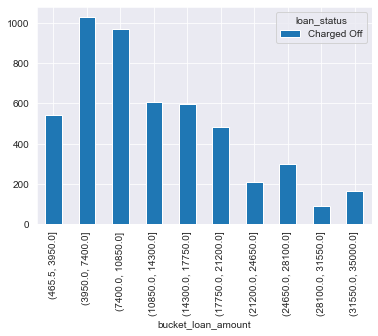

In [97]:
loan_data[loan_data.loan_status == "Charged Off"].groupby('bucket_loan_amount')['loan_status'].value_counts().unstack().plot(kind='bar')

#### Inference :
* Loans in the range USD 4000 to 11000 are risky

In [98]:
loan_data.dti.describe()

count    33726.000000
mean        13.509141
std          6.610145
min          0.000000
25%          8.440000
50%         13.620000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

In [99]:
loan_data['bucket_dti'] = pd.cut(loan_data.dti,10)
loan_data['bucket_dti']

0         (26.991, 29.99]
2          (5.998, 8.997]
3        (17.994, 20.993]
6        (20.993, 23.992]
8          (2.999, 5.998]
               ...       
39712     (8.997, 11.996]
39713      (5.998, 8.997]
39714      (-0.03, 2.999]
39715      (2.999, 5.998]
39716    (11.996, 14.995]
Name: bucket_dti, Length: 33726, dtype: category
Categories (10, interval[float64]): [(-0.03, 2.999] < (2.999, 5.998] < (5.998, 8.997] < (8.997, 11.996] ... (17.994, 20.993] < (20.993, 23.992] < (23.992, 26.991] < (26.991, 29.99]]

<AxesSubplot:xlabel='bucket_dti'>

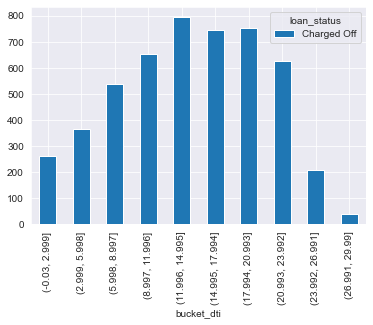

In [100]:
loan_data[loan_data.loan_status == "Charged Off"].groupby('bucket_dti')['loan_status'].value_counts().unstack().plot(kind='bar')

#### Inference :
* People seeking loans that are 12 to 20 times their total income lie in the red zone.

### Correlation Matrix

* Corelation Matrix indicates all the variable relation to each other.


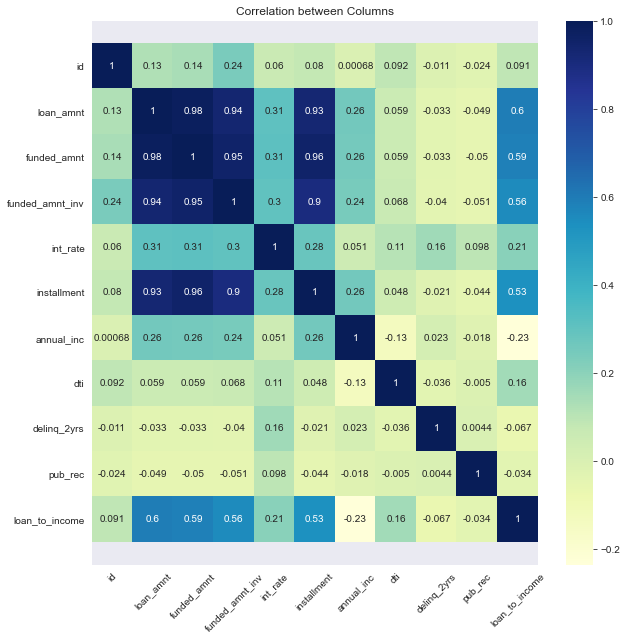

In [101]:
#Finding correlation matric
corr_matrix = loan_data.corr()
plt.figure(figsize=(10,10))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True,cmap="YlGnBu")

top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.xticks(rotation= 45)
plt.show()

#### Conclusions
- **Key Driving factors:**   
    * dti 
    * lti
    * int_rate
    * purpose
    * loan grades
    * pub_rec
    * emp_length


  - **Insight from Driving Factors:** 
    *  Most borrowers fall under A and B grades then other grades
    *  14.4%  defaulted the loan for various reason
    *  Top Loan availed categories are
            * debt_consolidation
            * credit_card
    * 20%  borrowers with 60months tenure are have high public derogatory record 
    * C,D,E loan graded borrowers tend to have having high pub_recs.
    * 14% of moderate to high interst rate borrowers are probablity  "charged off'.
    * High loan grades borrowers have very high interest rate.
    * Lower Grades loans borrowers tends to borrow higher loan amount prone to charged off.
    * Most likely  B, C, D loan grade  borrowers tend to charge off compare to other loan grades
    * Borrowers with high DTI has high probability to default
    * Out of The Top 6 purpose for borrowing, the debt_consolidation and Credit card has higher DTI
    * Junior experience level are prone to charge off if they tend borrow tenure more than 60month & high interest rates.
    * 12% of people with moderate and High lti are charged off at any given condition.
    * The loan with  longer tenure with higher interest rate charge off is significant.
    * The High charge off rate observed Loan borrowed for small buisness.
    
  

#### Broader Strategy : 
- **Make a Informed decision:**  
    * High chance of charge off
        * People from California, Florida, New York, Texas and New Jersey
        * dti OR lti rate high & Junior exp level & planned to take 60 month tenure & lended with high interest rate loan
        * Loan borrowed for credit card or debt consolidation and inclusive of any of the above condition
        * Small business inclusive all the above condition
        

#### Key coutcome
 * Look out for auditing dti and lti ratio which are highly likely driving factor  for loan approval
 * Lower experience level loans lending should be restricted as per the lti ration.
 * Make  mandatory grade examination for the borrowers before issuing loans to Low grade loan borrowers.
 * Small business loans are defaulted more. however small buisness with lower dti or Lti can be considered for loan approval
 * Loan for credit card and debt consolidation should be provided shorter tenure loans, for which borrowers should be within the dti and lti acceptable range.
 * People with more number of public derogatory records are having more chance of filing a bankruptcy. 
 * Lending club should make sure there are no public derogatory records for borrower